In [2]:
# import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../data/data_cleaned.csv')

# select target (y) and features (X)
X = data.drop(columns=["MEDV"])
y = data['MEDV']

# scale X value
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:

random_seed = 100
tf.random.set_seed(random_seed)

# Function to create the model
def create_model(dropout_rate=0.0, num_hidden_layers=1, neurons_per_layer=10, activation='relu'):
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=(X_train.shape[1],)))

    # Hidden layers
    for _ in range(num_hidden_layers - 1):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation))

    # Dropout layer
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


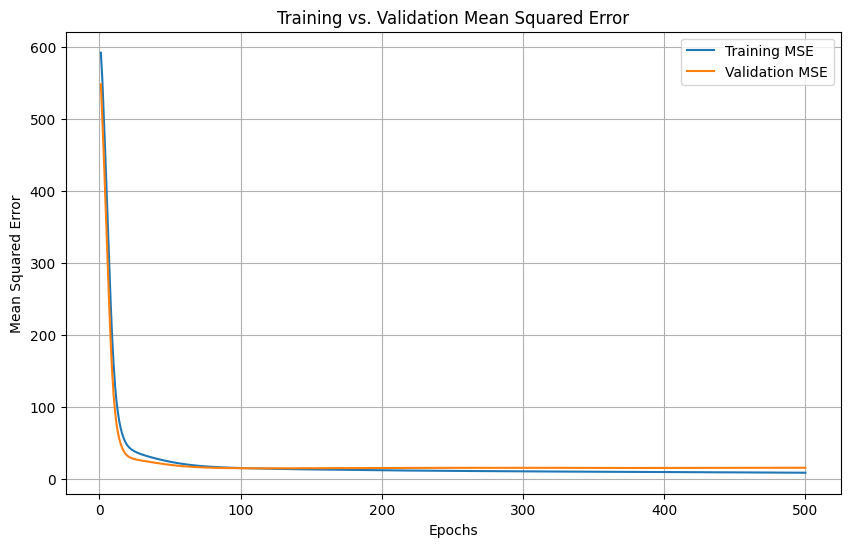

Final Mean Squared Error on the test set: 15.914240837097168
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R^2 on the test set: 0.8018549671953868


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.95 KB)

 Trainable params: 421 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844 (3.30 KB)

In [13]:

# hardcoded so that grid search need not be repeated
dropout_rate = 0
num_hidden_layers = 1
neurons_per_layer = 30
activation = 'relu'
batch_size = 10


epochs = 500
# Create the best model using the best hyperparameters
best_model = create_model(dropout_rate=dropout_rate, num_hidden_layers=num_hidden_layers, 
                          neurons_per_layer=neurons_per_layer, activation=activation)

# Compile the model
best_model.compile(optimizer='adam', loss='mse')

# Train the model and record training history
history = best_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                         validation_data=(X_test, y_test), verbose=0)

# Extract MSE values from training history
train_mse = history.history['loss']
val_mse = history.history['val_loss']

# Plot the training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_mse, label='Training MSE')
plt.plot(range(1, epochs + 1), val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Validation Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the final model
final_mse = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Mean Squared Error on the test set: {final_mse}")
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R^2 on the test set: {r2}")



# Print the model summary
best_model.summary()
